In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import json
import os
import scipy

### Protein lenght

In [5]:
# prot_count_dict = {}

# species = ! ls ../protein_sequences/

# c = 0

# for sp in species:
    
#     prot_count_dict[sp] = {}
    
#     files = ! ls ../protein_sequences/$sp
    
#     for f in files:
        
#         prot_count = ! grep -c "^>" ../protein_sequences/$sp/$f
#         prot_count = int(prot_count[0])
#         prog_name = f.split('.')[-4]
        
#         if prog_name == 'for_eval':
#             prog_name = 'ensembl'
        
#         prot_count_dict[sp][prog_name] = prot_count

In [6]:
# prot_count_df = pd.DataFrame.from_dict(prot_count_dict, orient = 'index')

In [7]:
# prot_count_df.to_csv('../results/protein_counts_species_tool.csv')

In [13]:
prot_count_df = pd.read_csv('../results/protein_counts_species_tool.csv', index_col=0)

In [14]:
prot_count_df

,augustus,geneidblastx,geneid,glimmer,ensembl,snap
amphiprion_percula,27801,21336,35393,41853,23719,40126
anabas_testudineus,20528,17856,24099,27645,23133,25670
anas_platyrhynchos,21269,16814,27388,63177,16658,65463
anser_brachyrhynchus,17058,14254,25513,60213,15398,68795
anser_cygnoides,17054,14172,25347,62336,15312,70081
...,...,...,...,...,...,...
varanus_komodoensis,22250,17734,37878,119205,17925,81840
xiphophorus_couchianus,22407,18227,27562,31865,20284,41038
xiphophorus_maculatus,27034,20775,33804,38976,23618,51527
zalophus_californianus,21543,23768,28807,181925,20509,135594


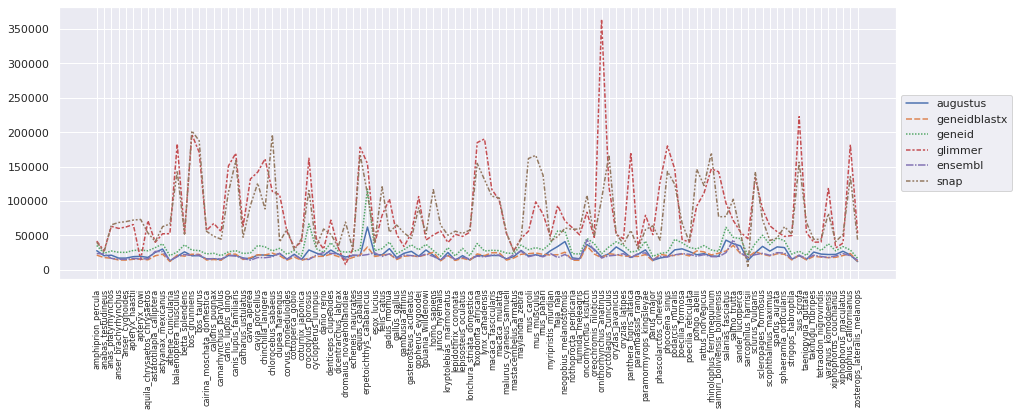

In [47]:
sns.set(rc={'figure.figsize':(15,5)})

g = sns.lineplot(data=prot_count_df)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

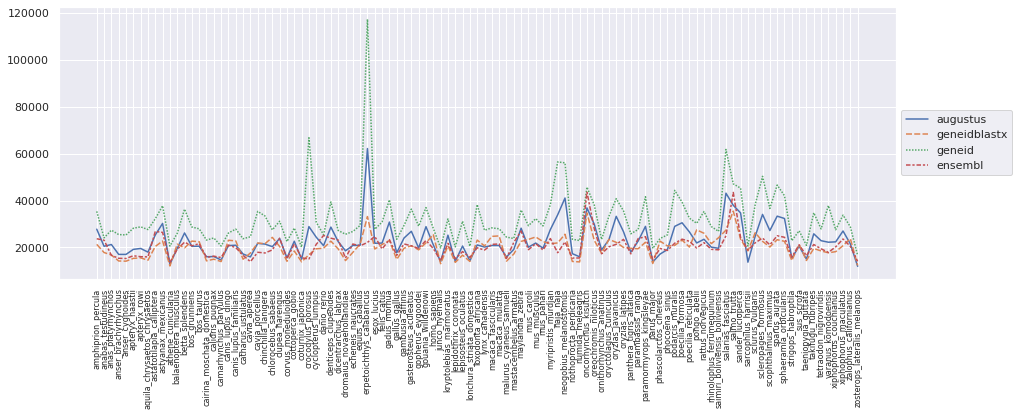

In [54]:
sns.set(rc={'figure.figsize':(15,5)})

g = sns.lineplot(data=prot_count_df[['augustus','geneidblastx','geneid','ensembl']])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

Text(0.5, 1.0, 'Gene count for 105 vertebrate species')

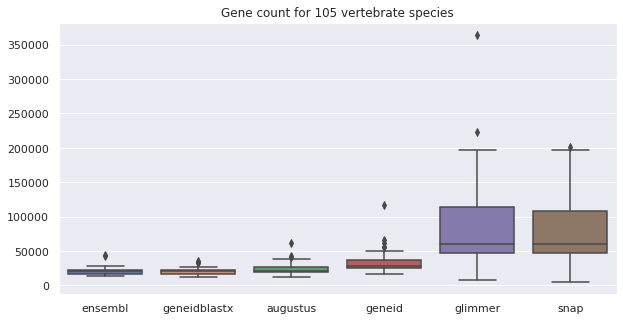

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = prot_count_df, order = ['ensembl','geneidblastx','augustus','geneid','glimmer','snap'])
plt.title('Gene count for 105 vertebrate species')

<AxesSubplot:>

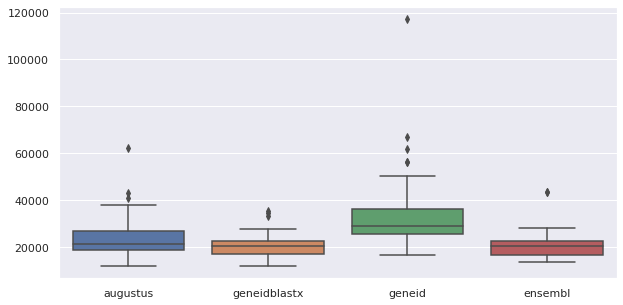

In [53]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = prot_count_df[['augustus','geneidblastx','geneid','ensembl']])

In [21]:
comparisons = [['ensembl','geneidblastx'],
               ['ensembl','augustus'],
               ['ensembl','snap'],
              ]

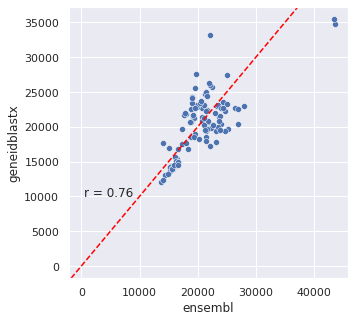

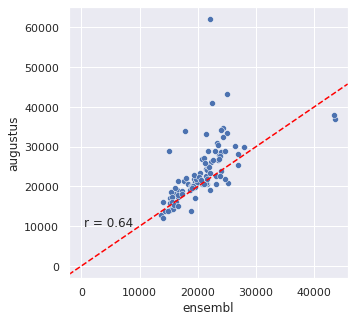

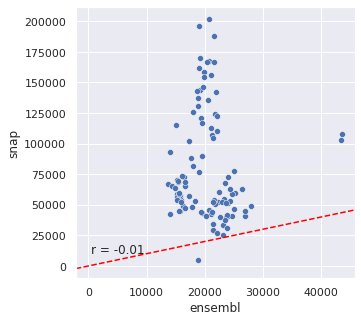

In [23]:
sns.set(rc={'figure.figsize':(5,5)})

for c in comparisons:
    
        
    r = scipy.stats.pearsonr(x = prot_count_df[c[0]], y = prot_count_df[c[1]])[0]
    a = sns.scatterplot(x = prot_count_df[c[0]], y = prot_count_df[c[1]])
    a.axline((0, 0), slope=1, linestyle='dashed', color = 'red')
    plt.text(500, 10000, 'r = ' + str(round(r, 2)), size= 12)
    plt.show()
    

### BUSCO fractions

In [24]:
results = '../raw_results/'
species = ! ls $results

In [25]:
! ls ../raw_results/amphiprion_percula

augustus  ensembl  geneid  geneidblastx  glimmer  snap


In [37]:
tools = ['ensembl','geneidblastx','augustus','geneid','glimmer','snap']

In [48]:
busco_df = pd.DataFrame()

for sp in species:
    for tool in tools:
        summ_res = f'{results}{sp}/{tool}/short_summary.specific.vertebrata_odb10.{tool}.json'
        if os.path.isfile(summ_res):
            
            with open(summ_res, 'r') as f:
                data = json.load(f)
                
                to_frame = data['results']
                to_frame['species'] = sp
                to_frame['tool'] = tool
                to_frame['gene_count'] = prot_count_df.loc[sp,tool]
                tmp_df = pd.DataFrame(to_frame, index = [1])
                busco_df = pd.concat([busco_df,tmp_df])
                                
        else:
            print (sp, tool, 'TODO!')
            
busco_df = busco_df.reset_index()

In [49]:
busco_df

,index,one_line_summary,Complete,Single copy,Multi copy,Fragmented,Missing,n_markers,domain,species,tool,gene_count
0,1,"C:95.2%[S:93.6%,D:1.6%],F:2.5%,M:2.3%,n:3354",95.2,93.6,1.6,2.5,2.3,3354,eukaryota,amphiprion_percula,ensembl,23719
1,1,"C:52.9%[S:50.7%,D:2.2%],F:27.0%,M:20.1%,n:3354",52.9,50.7,2.2,27.0,20.1,3354,eukaryota,amphiprion_percula,geneidblastx,21336
2,1,"C:73.0%[S:70.9%,D:2.1%],F:14.1%,M:12.9%,n:3354",73.0,70.9,2.1,14.1,12.9,3354,eukaryota,amphiprion_percula,augustus,27801
3,1,"C:54.4%[S:52.7%,D:1.7%],F:26.5%,M:19.1%,n:3354",54.4,52.7,1.7,26.5,19.1,3354,eukaryota,amphiprion_percula,geneid,35393
4,1,"C:56.9%[S:55.2%,D:1.7%],F:24.3%,M:18.8%,n:3354",56.9,55.2,1.7,24.3,18.8,3354,eukaryota,amphiprion_percula,glimmer,41853
...,...,...,...,...,...,...,...,...,...,...,...,...
625,1,"C:46.0%[S:45.1%,D:0.9%],F:29.2%,M:24.8%,n:3354",46.0,45.1,0.9,29.2,24.8,3354,eukaryota,zosterops_lateralis_melanops,geneidblastx,12357
626,1,"C:54.1%[S:53.0%,D:1.1%],F:19.1%,M:26.8%,n:3354",54.1,53.0,1.1,19.1,26.8,3354,eukaryota,zosterops_lateralis_melanops,augustus,11975
627,1,"C:40.8%[S:39.7%,D:1.1%],F:29.2%,M:30.0%,n:3354",40.8,39.7,1.1,29.2,30.0,3354,eukaryota,zosterops_lateralis_melanops,geneid,16605
628,1,"C:41.1%[S:39.4%,D:1.7%],F:28.8%,M:30.1%,n:3354",41.1,39.4,1.7,28.8,30.1,3354,eukaryota,zosterops_lateralis_melanops,glimmer,53156


In [52]:
busco_df = busco_df.melt(value_vars=['Complete','Fragmented','Missing','Single copy','Multi copy'],
              var_name='BUSCO_tag',
              value_name='percentage',
              id_vars=['n_markers','domain','species','tool','gene_count']
             )

In [53]:
busco_df.to_csv('../results/busco_overview_tools.csv')

In [54]:
busco_df

,n_markers,domain,species,tool,gene_count,BUSCO_tag,percentage
0,3354,eukaryota,amphiprion_percula,ensembl,23719,Complete,95.2
1,3354,eukaryota,amphiprion_percula,geneidblastx,21336,Complete,52.9
2,3354,eukaryota,amphiprion_percula,augustus,27801,Complete,73.0
3,3354,eukaryota,amphiprion_percula,geneid,35393,Complete,54.4
4,3354,eukaryota,amphiprion_percula,glimmer,41853,Complete,56.9
...,...,...,...,...,...,...,...
3145,3354,eukaryota,zosterops_lateralis_melanops,geneidblastx,12357,Multi copy,0.9
3146,3354,eukaryota,zosterops_lateralis_melanops,augustus,11975,Multi copy,1.1
3147,3354,eukaryota,zosterops_lateralis_melanops,geneid,16605,Multi copy,1.1
3148,3354,eukaryota,zosterops_lateralis_melanops,glimmer,53156,Multi copy,1.7


<AxesSubplot:xlabel='BUSCO_tag', ylabel='percentage'>

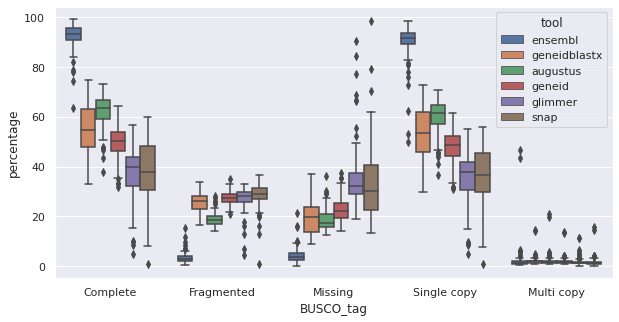

In [55]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data=busco_df, x='BUSCO_tag', y = 'percentage', hue = 'tool')

<AxesSubplot:xlabel='gene_count', ylabel='percentage'>

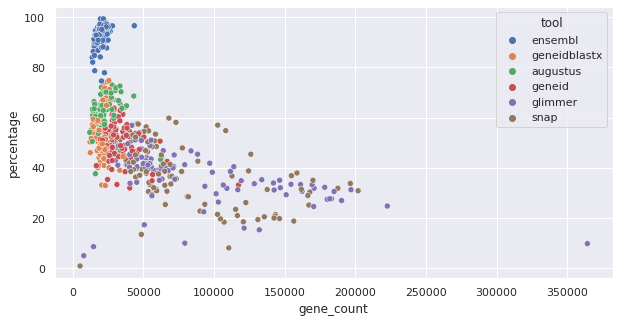

In [56]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data=busco_df[busco_df['BUSCO_tag']=='Complete'], y = 'percentage', x ='gene_count', hue ='tool')

<AxesSubplot:xlabel='percentage', ylabel='Count'>

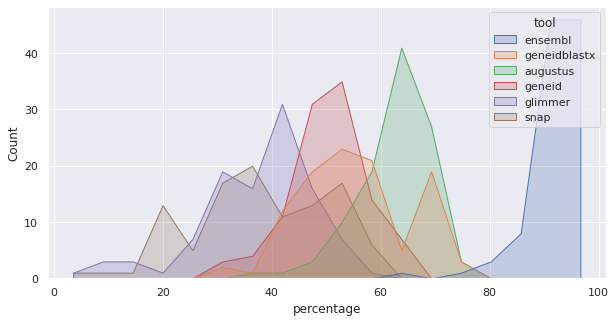

In [57]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=busco_df[(busco_df['BUSCO_tag']=='Complete')],x = 'percentage', hue ='tool', element="poly")

ensembl


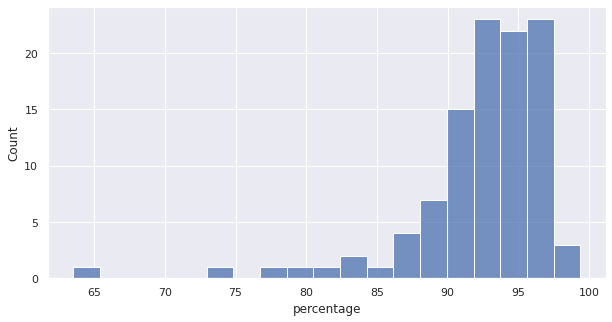

geneidblastx


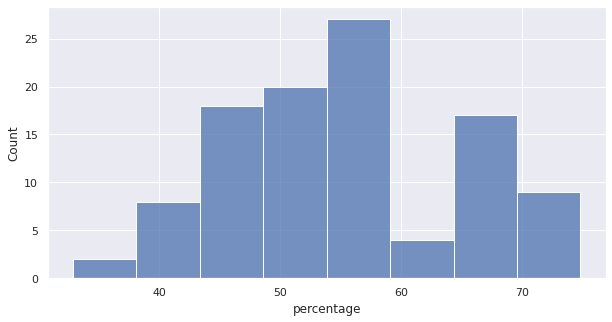

augustus


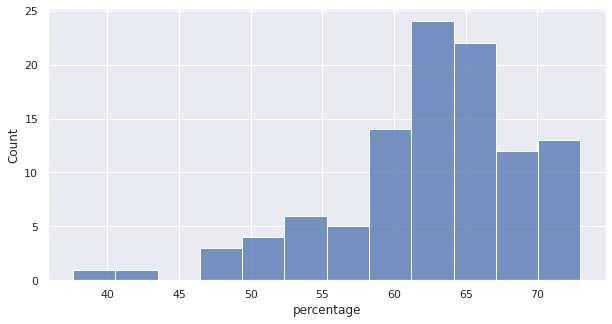

geneid


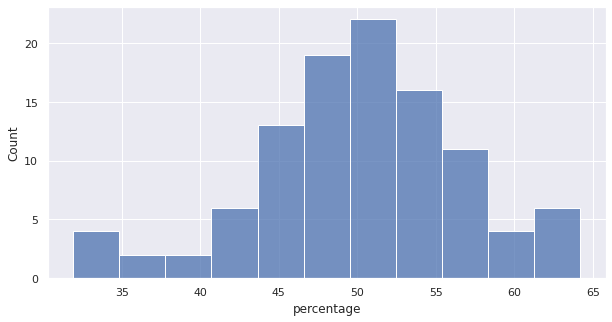

glimmer


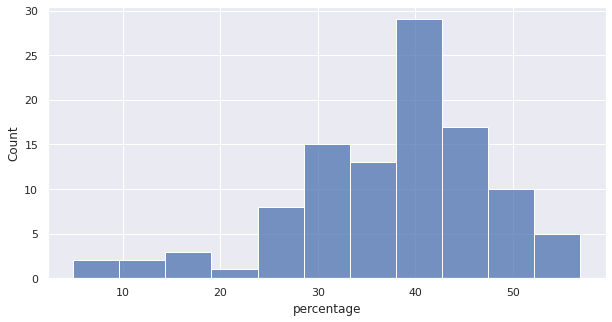

snap


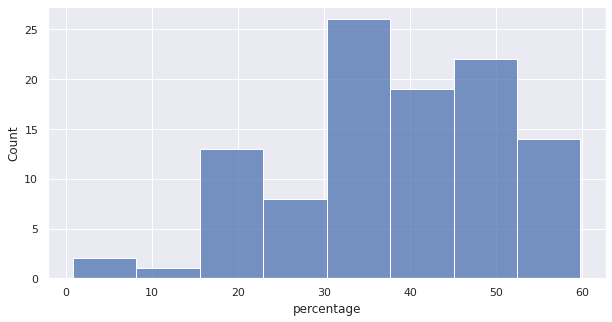

In [58]:
for i in busco_df.tool.unique():
    print (i)
    sns.histplot(data=busco_df[(busco_df['tool']==i)&(busco_df['BUSCO_tag']=='Complete')],x = 'percentage')
    plt.show()

ensembl


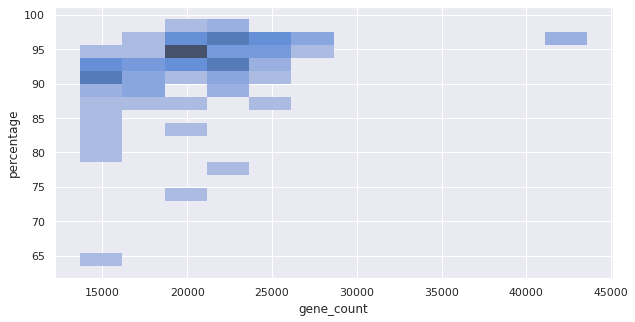

geneidblastx


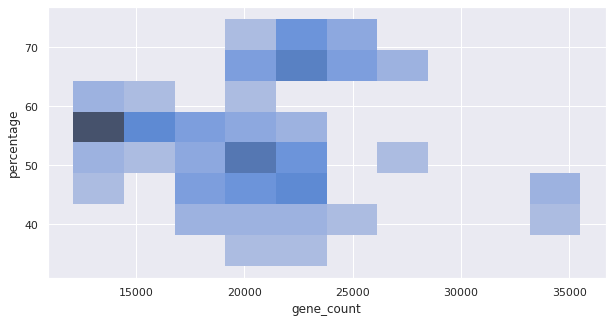

augustus


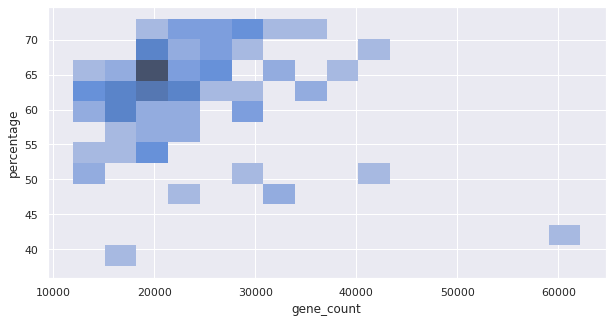

geneid


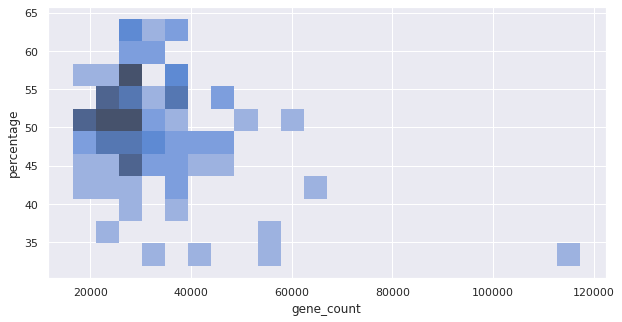

glimmer


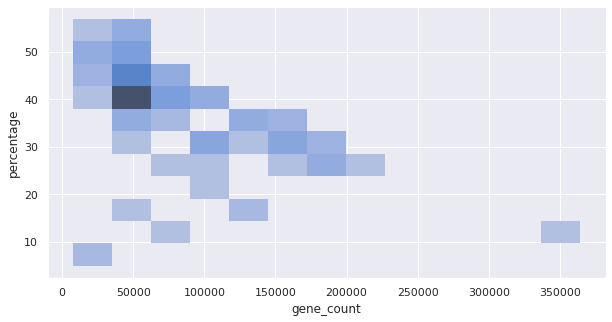

snap


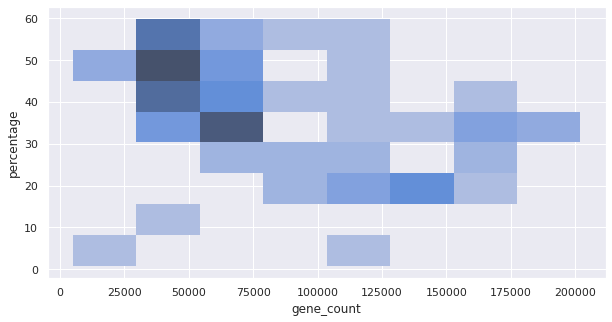

In [59]:
for i in busco_df.tool.unique():
    print (i)
    sns.histplot(data=busco_df[(busco_df['tool']==i)&(busco_df['BUSCO_tag']=='Complete')],
             x = 'gene_count', y = 'percentage')
    plt.show()